In [14]:
import pandas as pd

In [15]:
df = pd.read_parquet("../data/df_end_transaction_ma.parquet")

In [16]:
df

,product,price,amount,place,datetime
0,Целебные травы,3.90,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.90,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.90,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.90,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.90,1.367161,Анор Лондо,2216-01-02 05:33:00
...,...,...,...,...,...
875031,Эстус,9.28,1.079104,Фалькония,2218-09-27 14:50:00
875032,Эстус,9.28,1.580617,Фалькония,2218-09-27 06:16:00
875033,Эстус,9.28,1.738492,Фалькония,2218-09-27 11:14:00
875034,Эстус,9.28,0.430340,Фалькония,2218-09-27 22:24:00


(price - cost) * amount -> max <=> (price -> max) && (amount -> max)  
price ∈ (0, concurrent_price*1.2]  
d(price) ∈ [-1, 1]  
price[0] == price[1] == ... == price[k1], price[k1+1] == price[k1+2] == ... == price[k2], ..., price[kn] == ... == price[89],  
где k1 = 2...90, k2 = k1 + 3...90, kn = k[n-1]...90

In [17]:
competit = pd.read_parquet("../data/df_competitors.parquet")
cost = pd.read_parquet("../data/df_cost.parquet")
weather = pd.read_parquet("../data/weather_df.parquet")

In [18]:
import matplotlib.pyplot as plt

In [19]:
competit.head()

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
5,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11


In [20]:
cost.head()

,place,product,cost,date
0,Анор Лондо,Целебные травы,2.07,2216-01-02
1,Анор Лондо,Целебные травы,3.07,2216-01-26
2,Анор Лондо,Целебные травы,3.30,2216-02-12
3,Анор Лондо,Целебные травы,4.04,2216-03-06
4,Анор Лондо,Целебные травы,3.88,2216-03-27


In [21]:
df.head()

,product,price,amount,place,datetime
0,Целебные травы,3.9,1.242125,Анор Лондо,2216-01-02 16:28:00
1,Целебные травы,3.9,-0.079689,Анор Лондо,2216-01-02 16:21:00
2,Целебные травы,3.9,0.882450,Анор Лондо,2216-01-02 03:03:00
3,Целебные травы,3.9,0.621377,Анор Лондо,2216-01-02 03:12:00
4,Целебные травы,3.9,1.367161,Анор Лондо,2216-01-02 05:33:00


In [24]:
trans = df.copy()
trans["date"] = trans["datetime"].dt.strftime('%Y-%m-%d')
trans = trans.groupby(["product", "price", "place", "date"]).agg({"amount": sum}).reset_index()

In [25]:
trans

,product,price,place,date,amount
0,Целебные травы,2.73,Нокрон,2216-01-02,43.848762
1,Целебные травы,2.73,Нокрон,2216-01-03,54.649575
2,Целебные травы,2.73,Нокрон,2216-01-04,52.021861
3,Целебные травы,2.73,Нокрон,2216-01-05,47.634119
4,Целебные травы,2.73,Нокрон,2216-01-06,40.442636
...,...,...,...,...,...
15020,Эстус,23.89,Кеджистан,2218-09-23,53.420186
15021,Эстус,24.42,Кеджистан,2218-09-24,55.221321
15022,Эстус,24.42,Кеджистан,2218-09-25,57.675298
15023,Эстус,24.42,Кеджистан,2218-09-26,39.720947


In [27]:
trans['competitor'] = 'Our_company'

# Удаляем столбец "amount"
trans = trans.drop(["amount"], axis=1)

# Добавляем обновленный DataFrame trans к DataFrame competit
competit = pd.concat([competit, trans], ignore_index=True)

In [33]:
competit['date'] = pd.to_datetime(competit['date'])

In [34]:
competit

,place,product,competitor,price,date
0,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-04
1,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-05
2,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-06
3,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-09
4,Анор Лондо,Целебные травы,Арториас&Co,3.78,2216-01-11
...,...,...,...,...,...
46819,Кеджистан,Эстус,Our_company,23.89,2218-09-23
46820,Кеджистан,Эстус,Our_company,24.42,2218-09-24
46821,Кеджистан,Эстус,Our_company,24.42,2218-09-25
46822,Кеджистан,Эстус,Our_company,24.42,2218-09-26


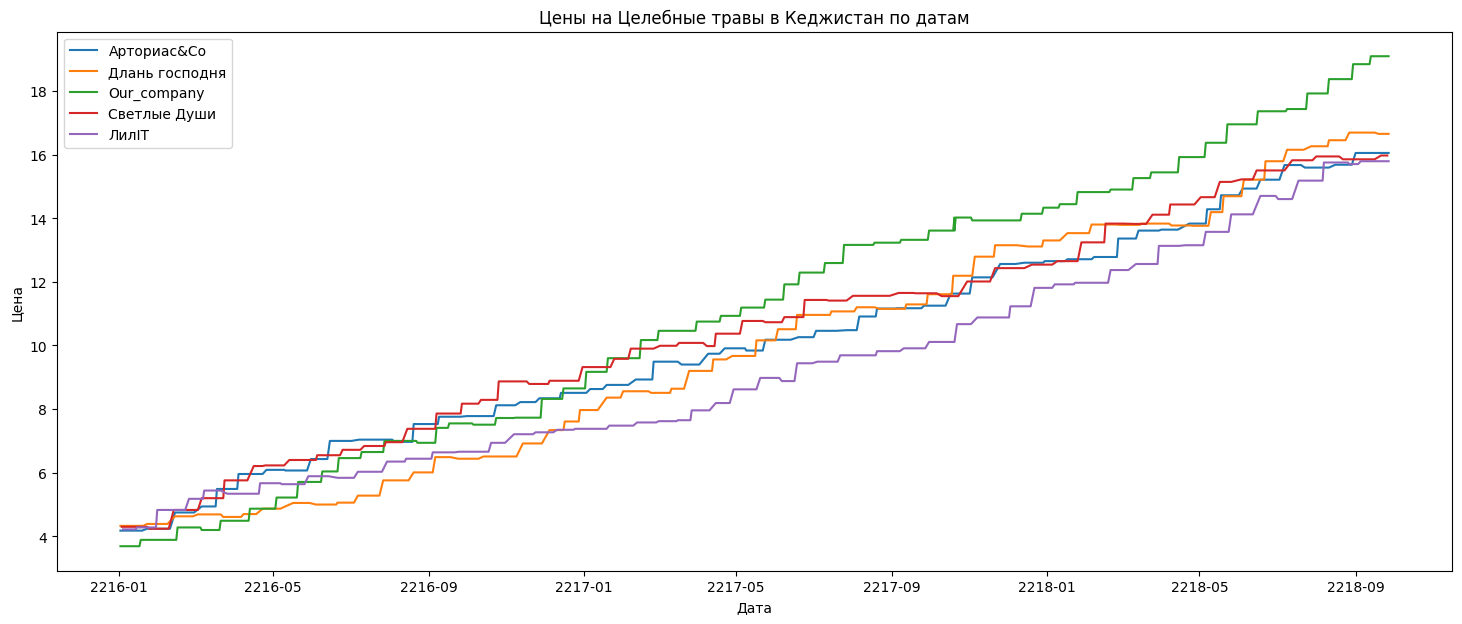

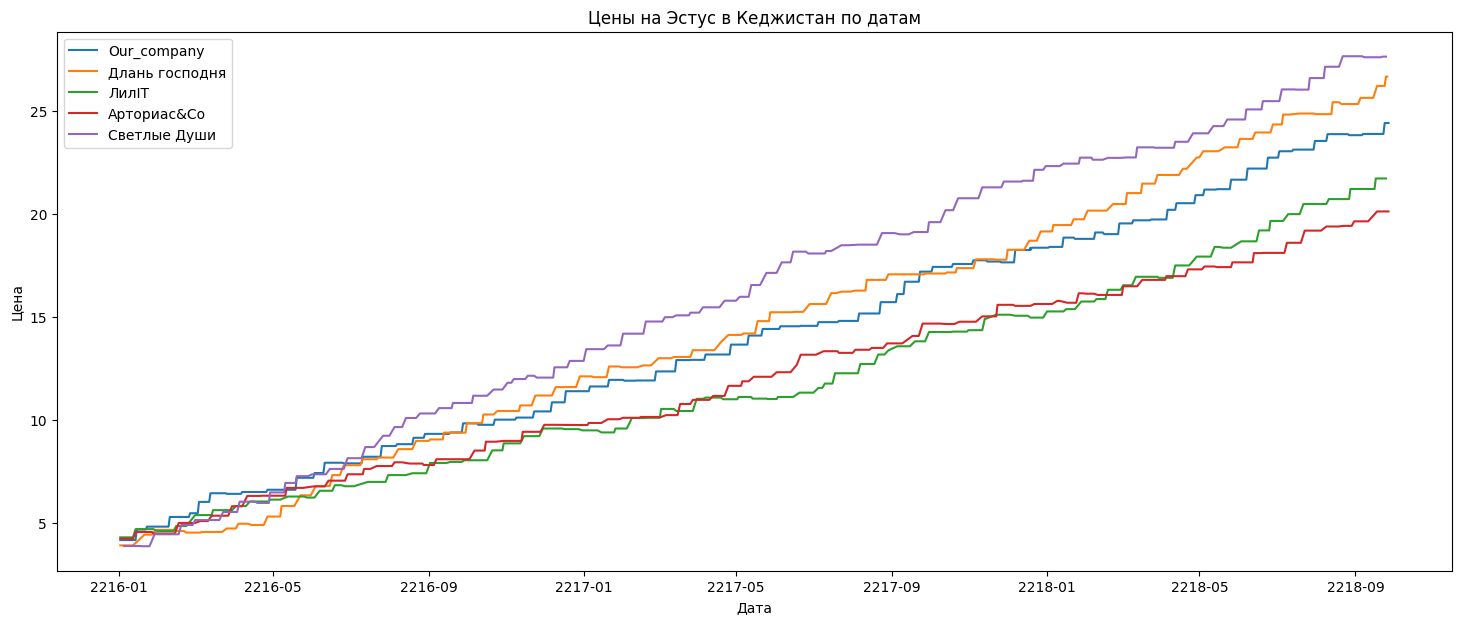

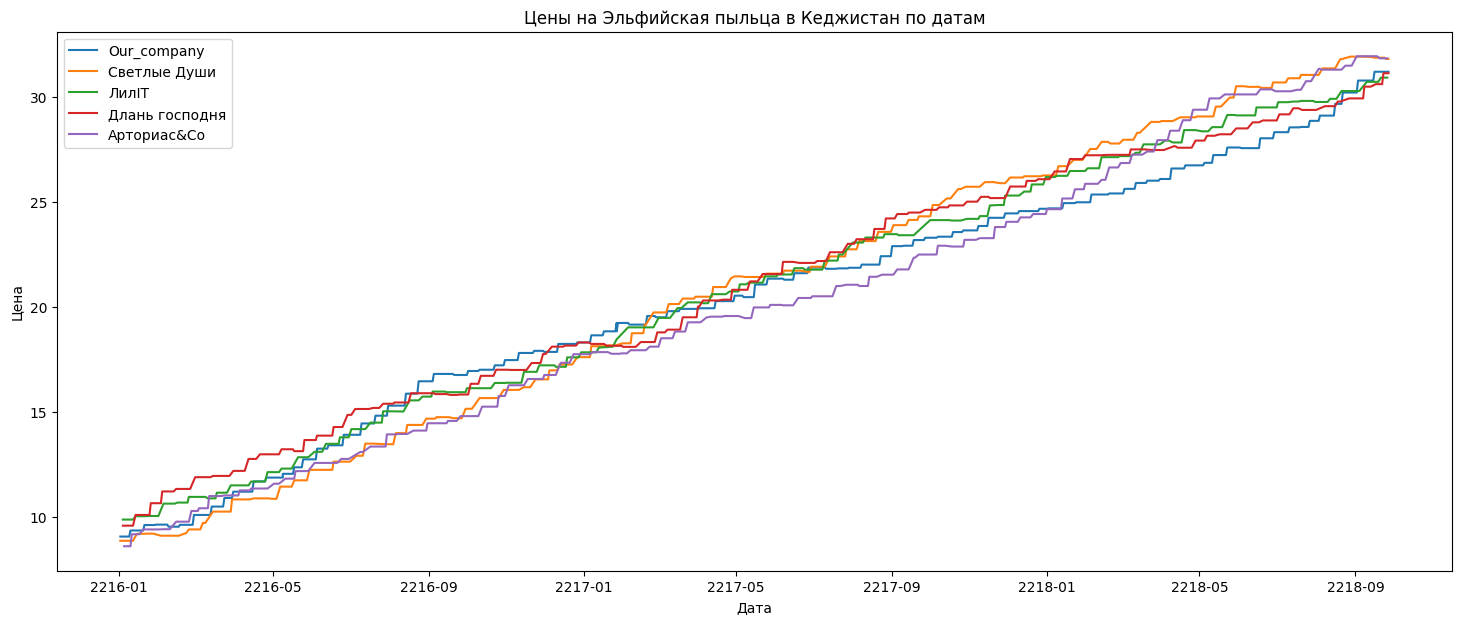

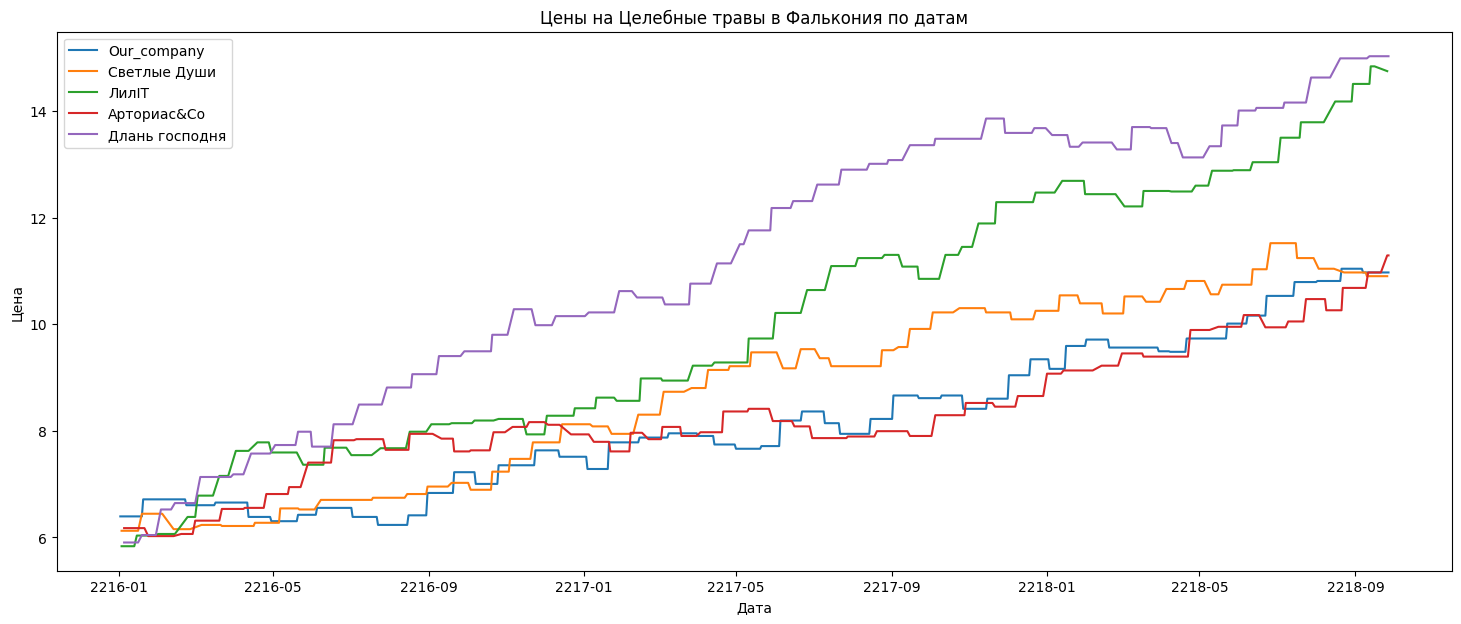

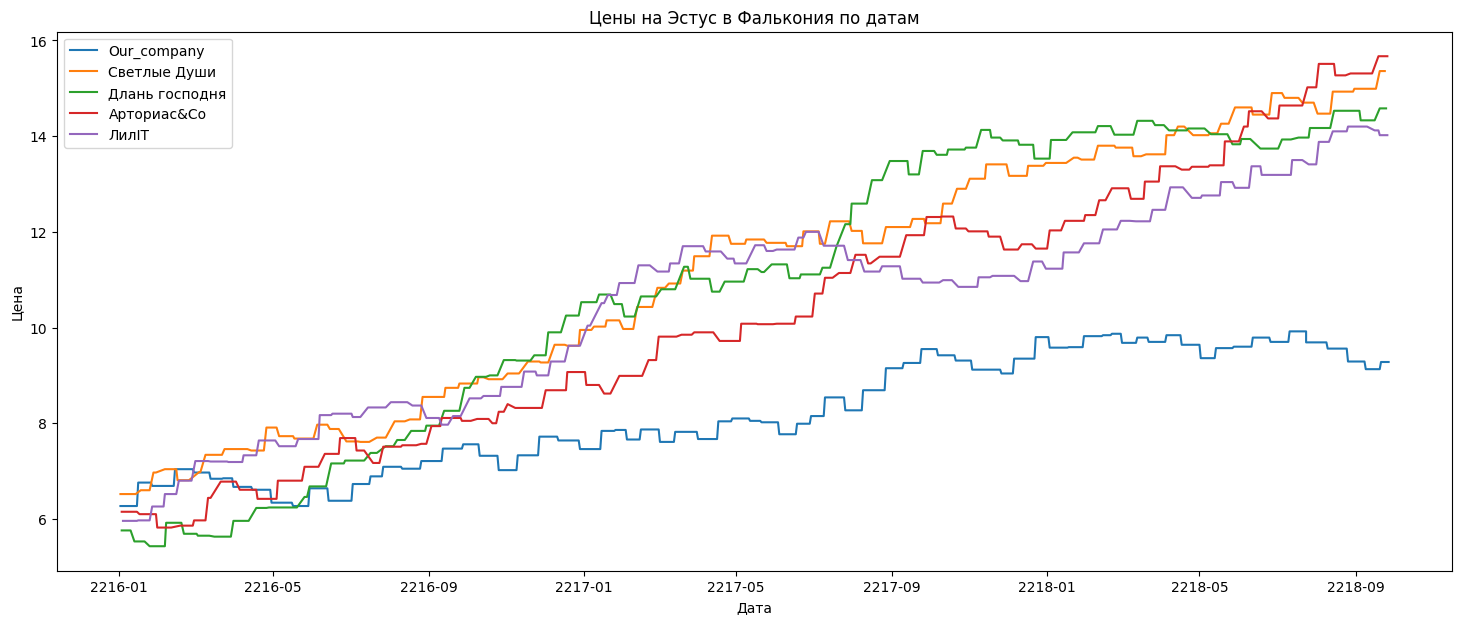

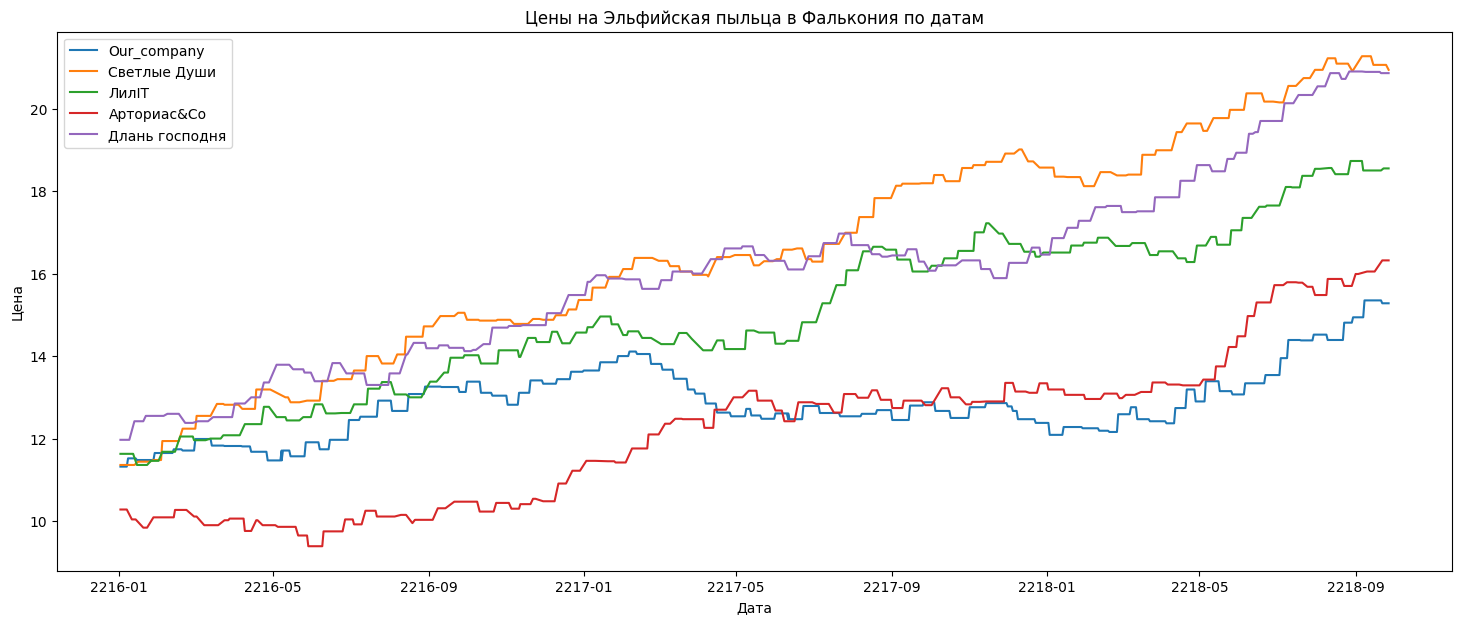

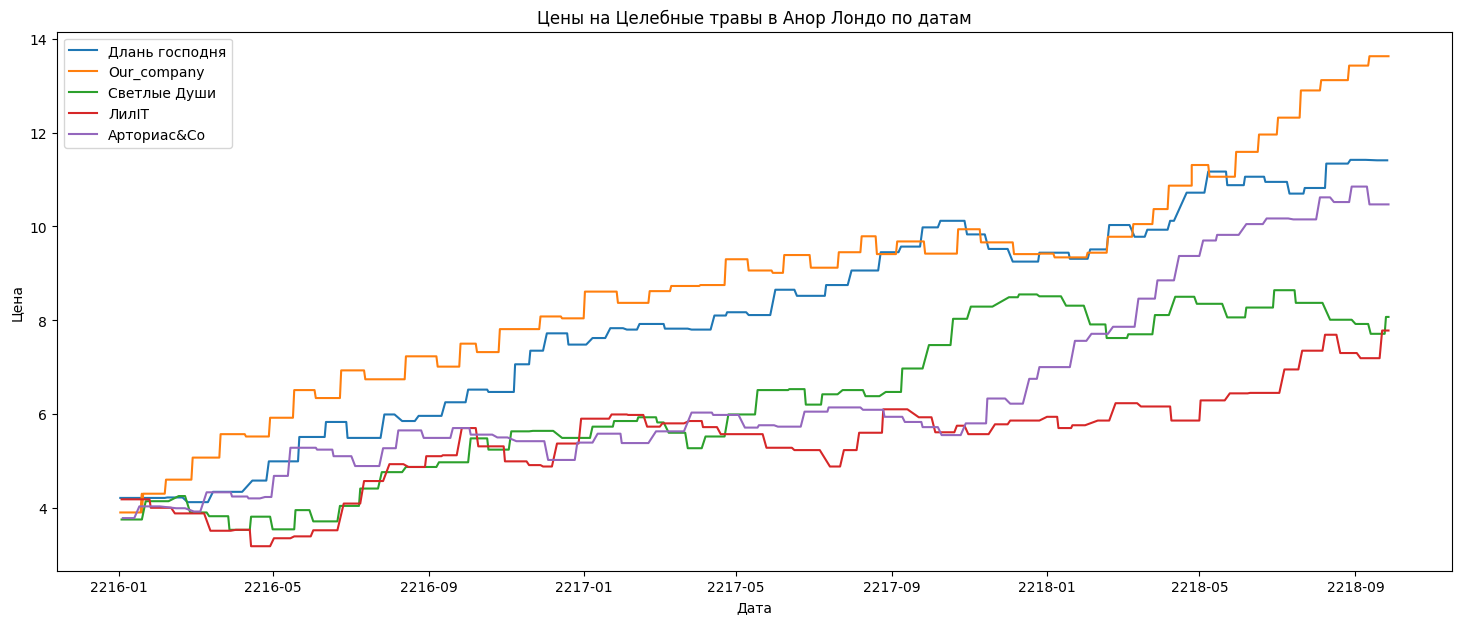

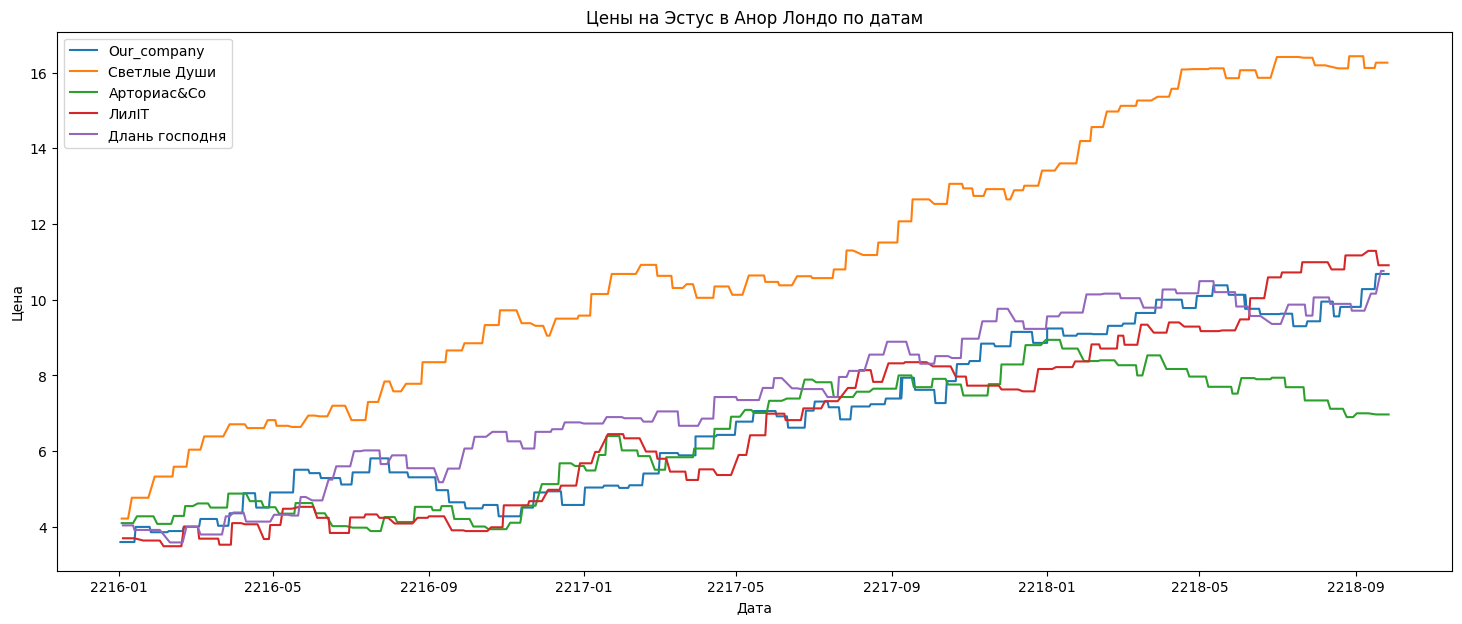

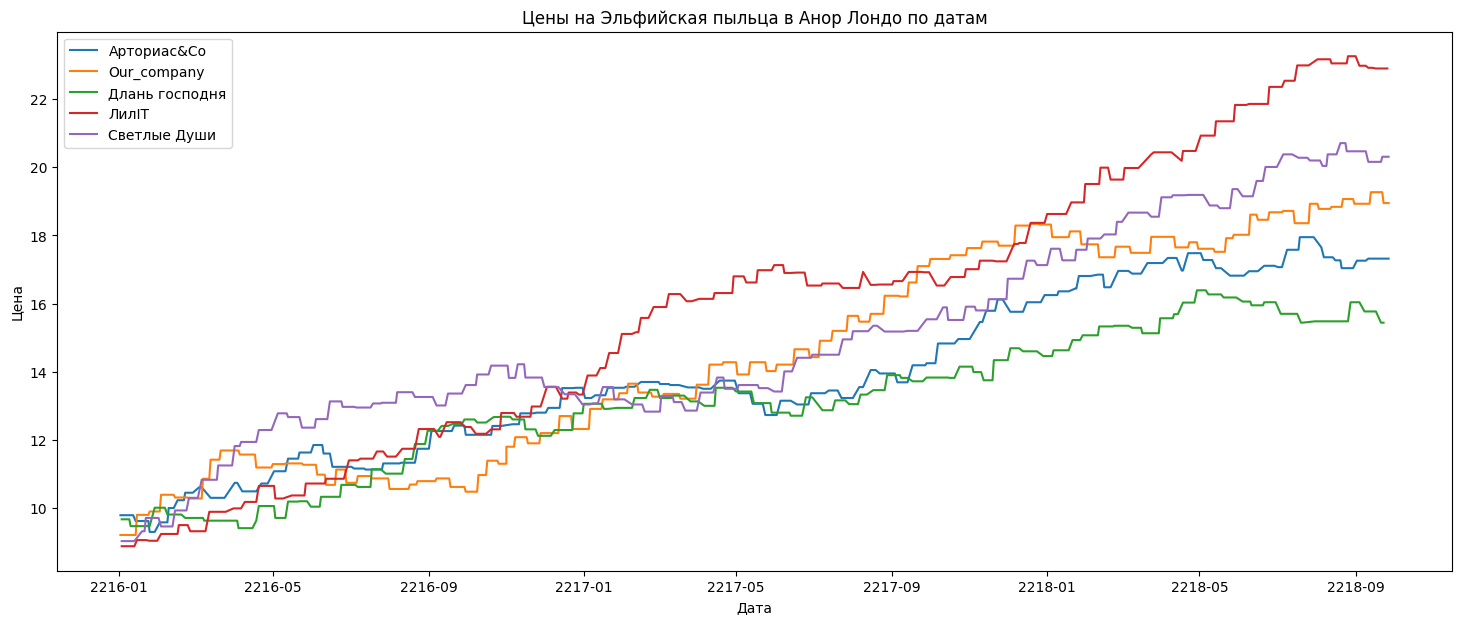

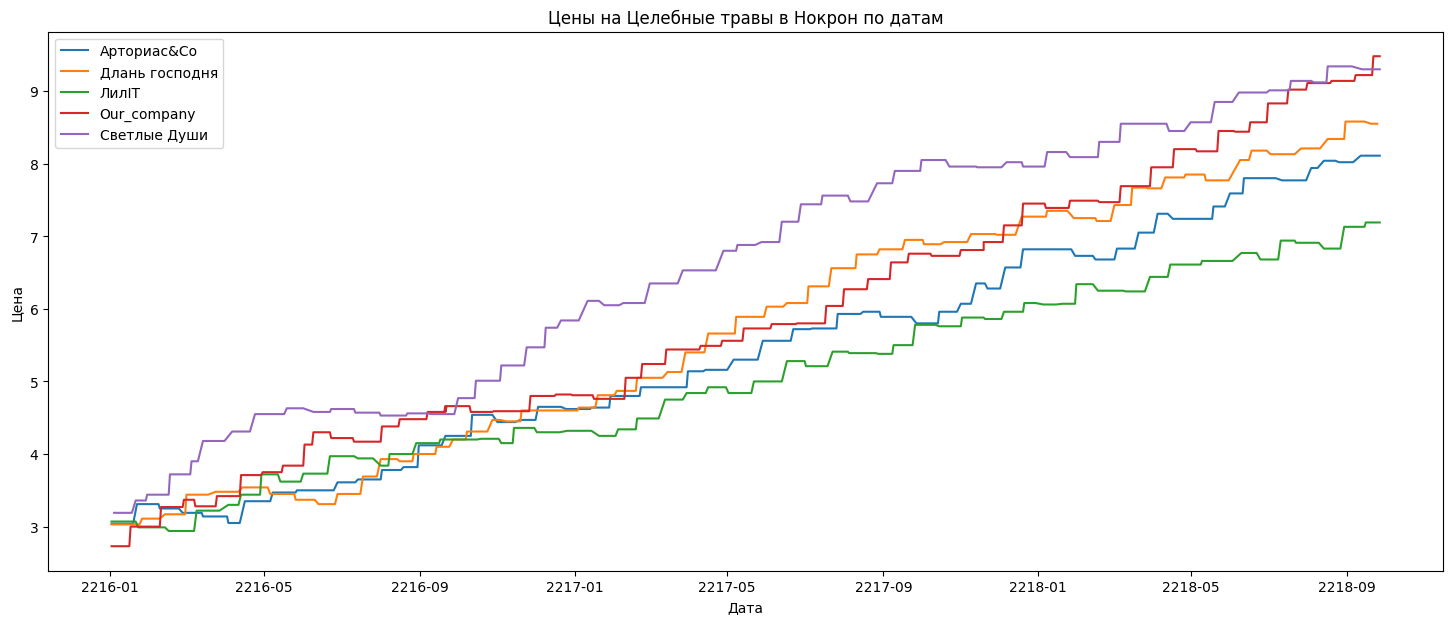

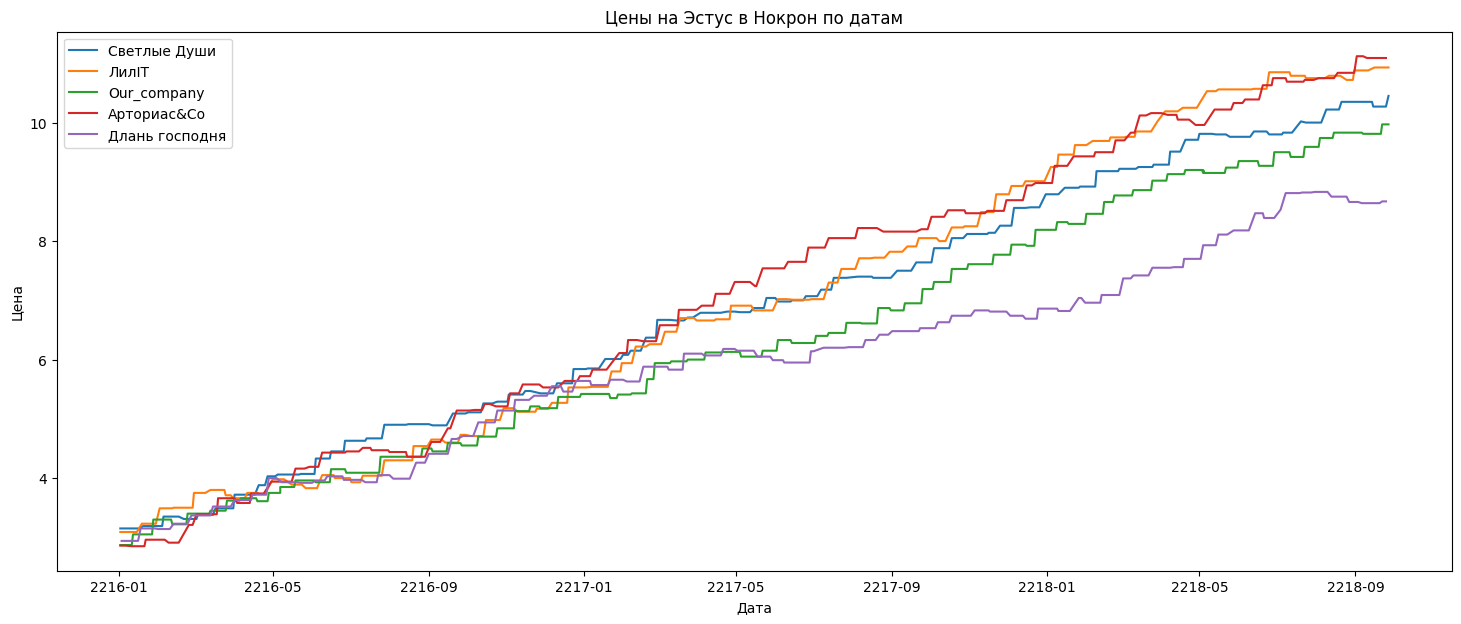

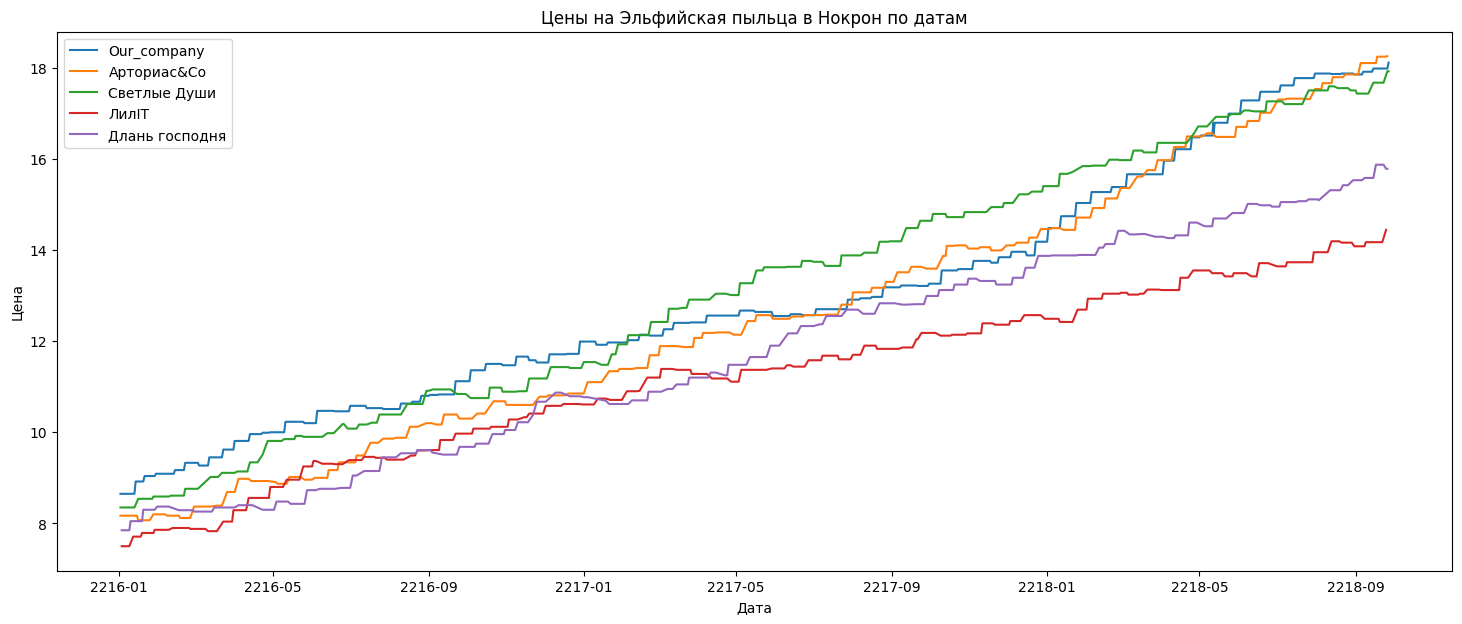

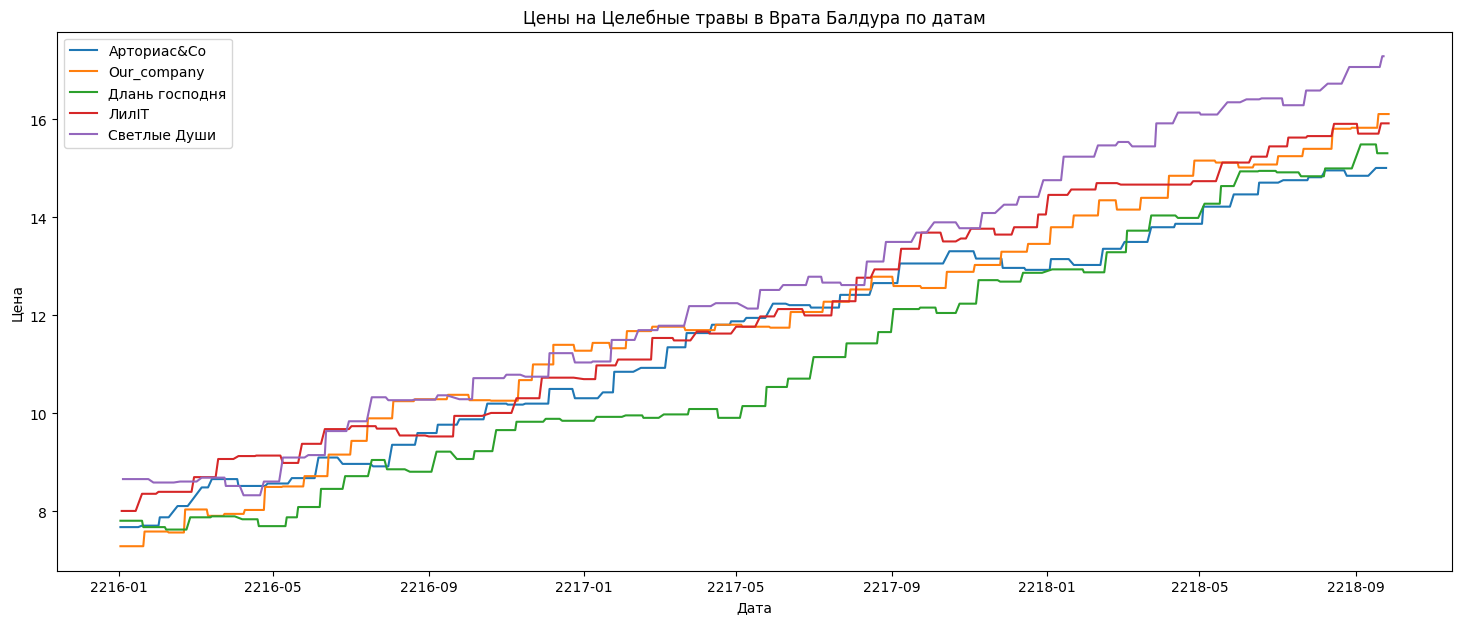

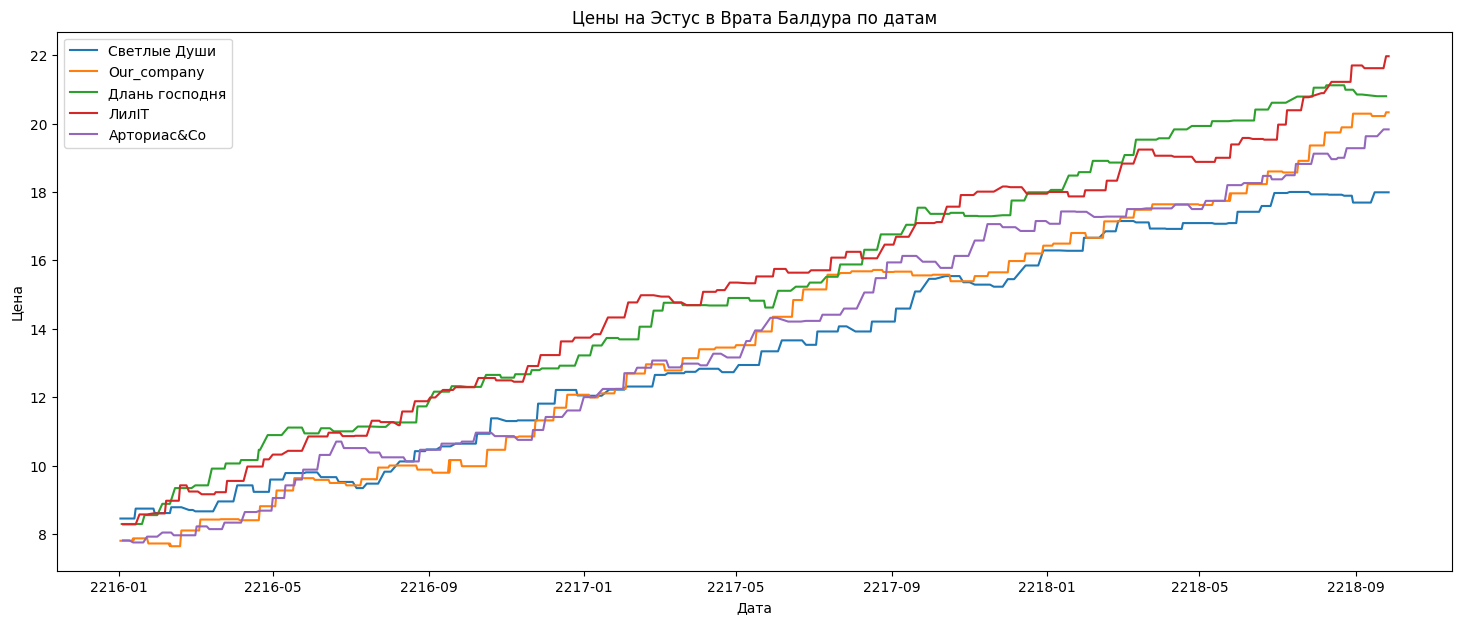

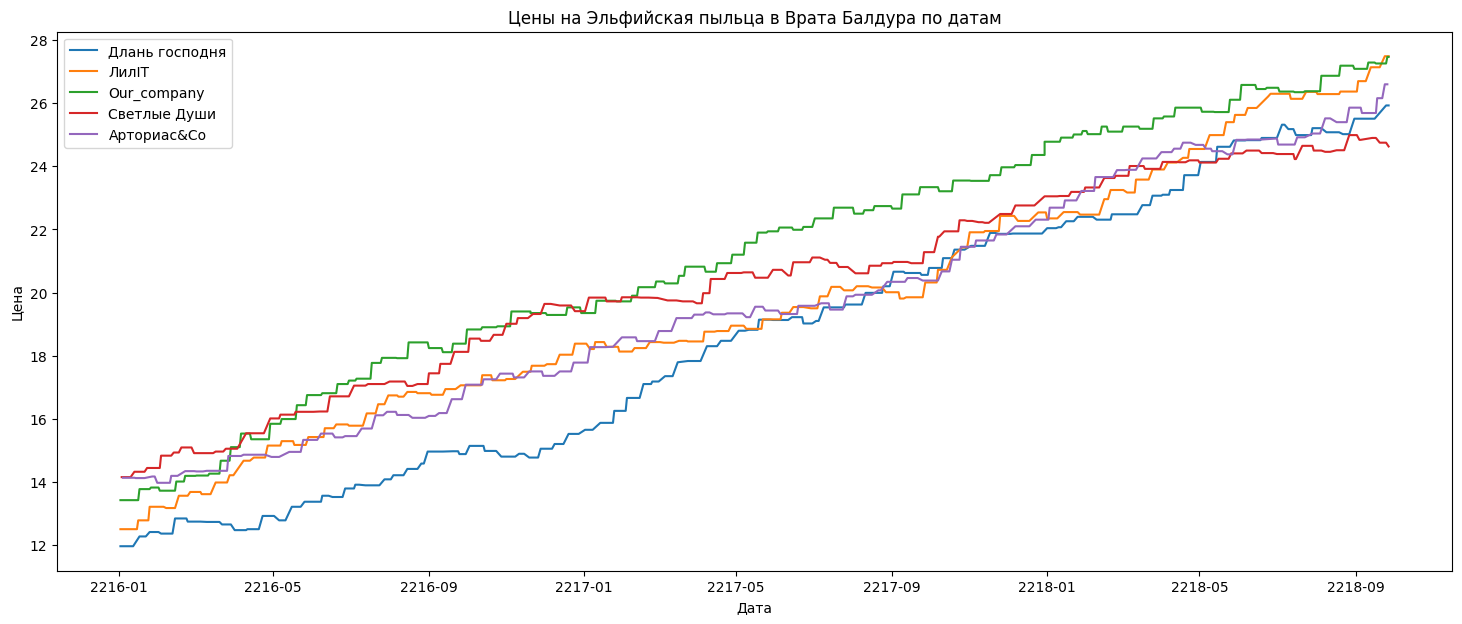

In [39]:
places = competit['place'].unique()
products = competit['product'].unique()
competit = competit.sort_values(by='date')

# Цикл по всем уникальным местам и продуктам для отображения графиков
for place in places:
    for product in products:
        # Фильтруем данные для конкретного места и продукта
        subset = competit[(competit['place'] == place) & (competit['product'] == product)]
        
        # Проверяем, есть ли в подмножестве данные
        if not subset.empty:
            plt.figure(figsize=(18, 7))
            plt.title(f'Цены на {product} в {place} по датам')
            plt.xlabel('Дата')
            plt.ylabel('Цена')
            
            # Группируем данные по компании и дате и строим линии цен
            for company in subset['competitor'].unique():
                company_data = subset[subset['competitor'] == company]
                plt.plot(company_data['date'], company_data['price'], label=company)
            
            plt.legend()
            plt.show()